In [ ]:
#Введение в машинное обучение

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Загрузка данных
train_path = r"D:\Эстер\с рс\Courses\ML Engineer\HWEster13\kaggle_archive\train.csv"
df = pd.read_csv(train_path)

In [3]:
# Просмотр первых строк
print("Первых 5 строк данных:")
print(df.head())

# Проверяем наличие пропусков
print("\nДоля пропущенных значений:")
print(df.isnull().mean())

# Описательная статистика
print("\nОсновные статистики:")
print(df.describe())

# Анализ целевой переменной
print("\nРаспределение целевой переменной:")
print(df['target'].value_counts(normalize=True))

Первых 5 строк данных:
   id  gravity    ph  osmo  cond  urea  calc  target
0   0    1.013  6.19   443  14.8   124  1.45       0
1   1    1.025  5.40   703  23.6   394  4.18       0
2   2    1.009  6.13   371  24.5   159  9.04       0
3   3    1.021  4.91   442  20.8   398  6.63       1
4   4    1.021  5.53   874  17.8   385  2.21       1

Доля пропущенных значений:
id         0.0
gravity    0.0
ph         0.0
osmo       0.0
cond       0.0
urea       0.0
calc       0.0
target     0.0
dtype: float64

Основные статистики:
               id     gravity          ph         osmo        cond  \
count  414.000000  414.000000  414.000000   414.000000  414.000000   
mean   206.500000    1.017894    5.955459   651.545894   21.437923   
std    119.655756    0.006675    0.642260   234.676567    7.514750   
min      0.000000    1.005000    4.760000   187.000000    5.100000   
25%    103.250000    1.012000    5.530000   455.250000   15.500000   
50%    206.500000    1.018000    5.740000   679.500000

<Figure size 1200x600 with 0 Axes>

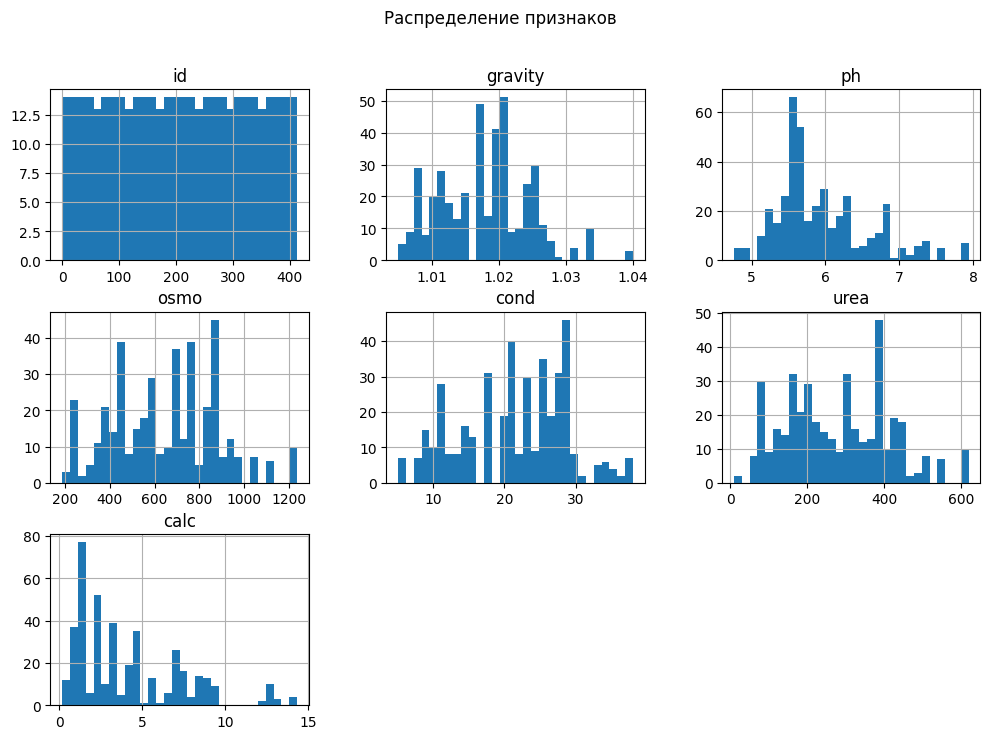

In [4]:
# Визуализация распределения признаков
plt.figure(figsize=(12, 6))
df.drop(columns=['target']).hist(bins=30, figsize=(12, 8))
plt.suptitle("Распределение признаков")
plt.show()

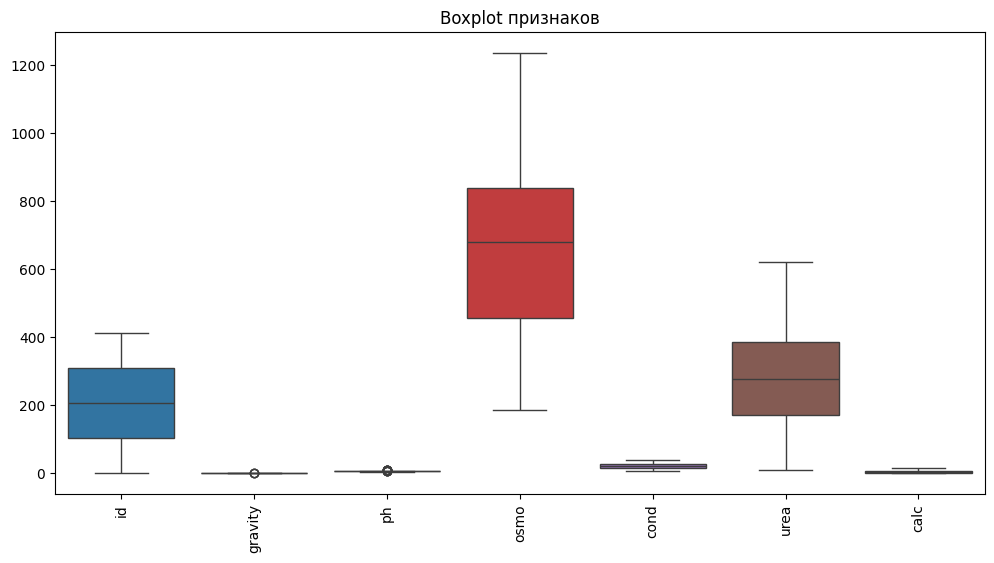

In [5]:
# Boxplot для поиска выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['target']))
plt.title("Boxplot признаков")
plt.xticks(rotation=90)
plt.show()

In [6]:
# Разделение на признаки и целевую переменную
X = df.drop(columns=['target'])
y = df['target']

# Разделение на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

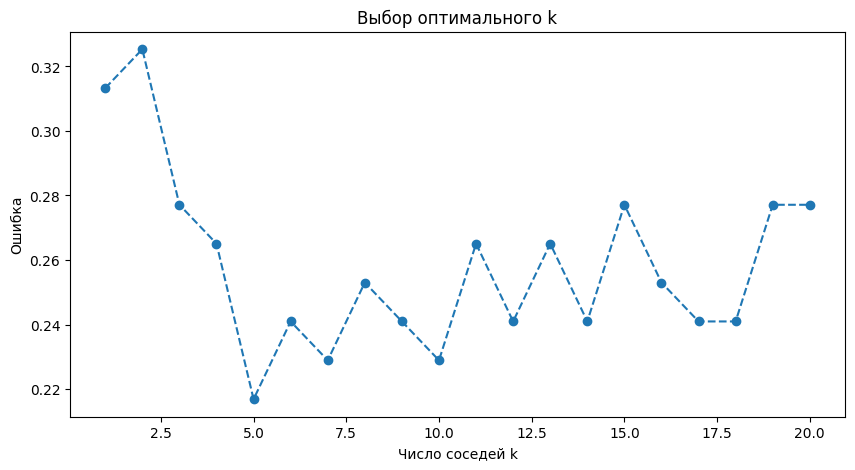

In [7]:
# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Выбор оптимального k
error_rates = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    error_rates.append(1 - accuracy_score(y_test, y_pred_k))

# Визуализация зависимости ошибки от k
plt.figure(figsize=(10, 5))
plt.plot(k_range, error_rates, marker='o', linestyle='dashed')
plt.xlabel("Число соседей k")
plt.ylabel("Ошибка")
plt.title("Выбор оптимального k")
plt.show()

In [9]:
# Обучение модели KNN с оптимальным k
optimal_k = error_rates.index(min(error_rates)) + 1
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


In [10]:
# Оценка качества модели
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Оптимальный k: {optimal_k}")
print("Матрица ошибок:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Оптимальный k: 5
Матрица ошибок:
[[37  9]
 [ 9 28]]
Accuracy: 0.7831
Precision: 0.7568
Recall: 0.7568
F1-score: 0.7568
ROC-AUC: 0.7806
